## Removal of seasonality

### Import libraries

In [1]:
import pandas as pd
import statsmodels.api as sm

### Parameters  

In [2]:
csv_in = 'prec_tokyo_since2011-utf8.csv'

### Read CSV file  

In [3]:
df_season = pd.read_csv(csv_in, delimiter=',', skiprows=1, header=0)
df_season['Date'] = pd.to_datetime(df_season['Date'], format="%Y/%m/%d")
print(df_season.shape)
print(df_season.info())
display(df_season.head())

(2922, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
Date        2922 non-null datetime64[ns]
Prec(mm)    2922 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.7 KB
None


,Date,Prec(mm)
0,2011-01-01,0.0
1,2011-01-02,0.0
2,2011-01-03,0.0
3,2011-01-04,0.0
4,2011-01-05,0.0


### Extract precipitation data  

In [4]:
prec = df_season['Prec(mm)']
prec.index = df_season['Date']  # should set Date information as index
prec_monthly = prec.resample('M').mean()  # Obtain average per week
print(prec_monthly.dtype)
display(prec_monthly.head())

float64


Date
2011-01-31    0.112903
2011-02-28    5.392857
2011-03-31    2.387097
2011-04-30    3.200000
2011-05-31    6.887097
Freq: M, Name: Prec(mm), dtype: float64

### See the original data  

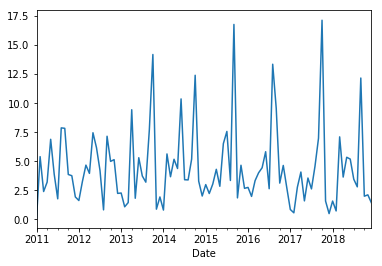

In [5]:
prec_monthly.plot(kind='line')

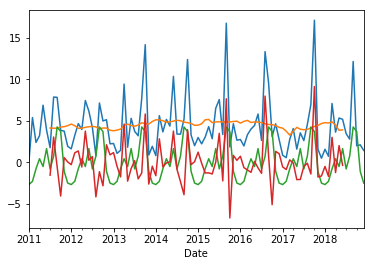

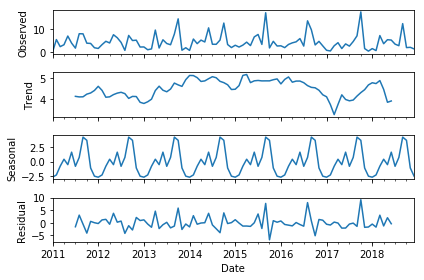

In [6]:
result = sm.tsa.seasonal_decompose(prec_monthly)  # Analysis of seasonality
result.observed.plot()  # original data
result.trend.plot()  # without seasonality
result.seasonal.plot()  # seasonality
result.resid.plot()  # residual
pfig = result.plot()  # all in one figure